In [ ]:
import tensorflow as tf


In [ ]:
print(tf.__version__)

2.13.0


In [ ]:
# import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
data=pd.read_csv('churn_modeling.csv')

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# we can see that this is a binary classification problem. we need to predicit whether the customer will exit the bank or company etc..
# we has to prevent this exit of customer by providing extra service. for that we need to find whether exit or not first

In [ ]:
# divide the dataset into independent and dependent feature
# in X, we dont want rownumber, id,surname columns, bcz it doesnt play anything in exiting of customer .

X=data.iloc[:,3:13]
y=data.iloc[:,13]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
#  # Feature engineering
# here gender and geography is categorical. so convert it into numerical
X.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
X.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
# in both the case , low cardinality. so we can use one hot encoding

geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [ ]:
# concatenate this with the dataframe and drop old gender and geography column
X=X.drop(['Geography','Gender'],axis=1)


In [ ]:
X=pd.concat([X,geography,gender],axis=1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
# train test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
# the most important thing in ANN is feature scaling.(Linear Regression,log reg, ann,knn,kmeans ....all required feature scaling)
# distance based and gradient descent require feature scaling

In [ ]:
# feature scaling. (Standerd scaling for ANN and MIn_max scaling for CNN)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
# part 2 - create ANN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
classifier=Sequential()

In [ ]:
# add input layer
classifier.add(Dense(units=11,activation='relu'))

In [ ]:
# first hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [ ]:
# second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [ ]:
# adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [ ]:
# train the model
classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# Early stopping
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)



Epoch 1/1000
536/536 [==============================] - 12s 5ms/step - loss: 0.4824 - accuracy: 0.7957 - val_loss: 0.4506 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4354 - accuracy: 0.7981 - val_loss: 0.4373 - val_accuracy: 0.8084
Epoch 3/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4223 - accuracy: 0.8143 - val_loss: 0.4315 - val_accuracy: 0.8114
Epoch 4/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4152 - accuracy: 0.8210 - val_loss: 0.4261 - val_accuracy: 0.8118
Epoch 5/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.4081 - accuracy: 0.8207 - val_loss: 0.4182 - val_accuracy: 0.8137
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3948 - accuracy: 0.8321 - val_loss: 0.4073 - val_accuracy: 0.8251
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3778 - accuracy: 0.8470 - val_loss: 0.3868 - val_accuracy

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

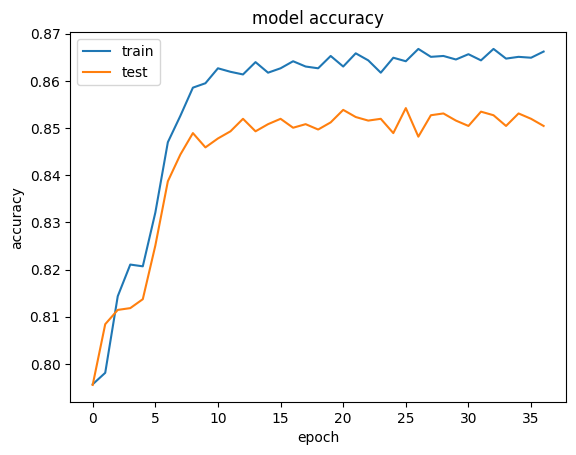

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

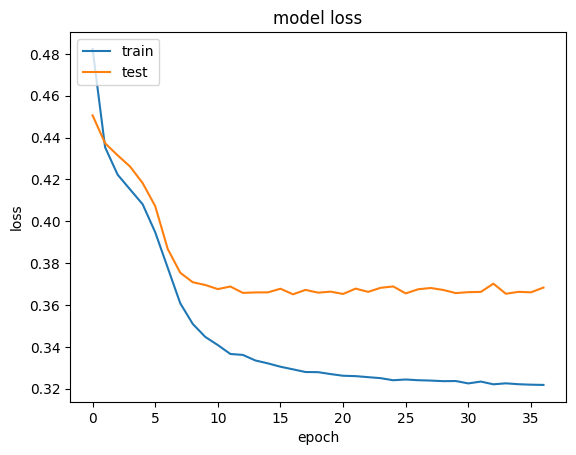

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
# making prediction and evaluating the model
y_pred=classifier.predict(X_test)
y_pred=(y_pred >= 0.5)

63/63 [==============================] - 0s 4ms/step


In [ ]:
# make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1488,  107],
       [ 184,  221]])

In [ ]:
# calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8545

In [ ]:
# get the weights
classifier.get_weights()

[array([[ 0.06987609, -0.16079648,  0.08055679,  0.11097942, -0.07626919,
         -0.29589406,  0.425423  ,  0.06203122, -0.08254348, -0.45420846,
          0.01778676],
        [-0.67723215, -0.16637778, -0.76219213, -0.18408217,  0.35016638,
         -0.03759435,  0.44303927,  0.1633181 , -0.7013243 , -0.157115  ,
          0.5139047 ],
        [-0.01892767, -0.12832999, -0.13666803, -0.4792931 , -0.1448638 ,
          0.24857841,  0.20741257,  0.26720396,  0.17771438, -0.04531248,
          0.0244934 ],
        [-0.00387486,  0.801915  ,  0.03482713,  0.7900573 ,  0.07715755,
          0.09287217,  0.22192104, -0.78487676, -0.30472058,  0.41490644,
         -0.05293208],
        [-0.10629717,  1.4649265 ,  0.01607062, -0.09544504,  0.72161144,
          0.3176333 ,  0.23132199, -1.01012   ,  0.2981244 , -0.4429455 ,
          0.6621706 ],
        [ 0.08965452, -0.194965  , -0.2313859 ,  0.42329648,  0.299784  ,
          0.02562153, -0.4632722 , -0.17181472, -0.13481957, -0.2758488

In [ ]:
|